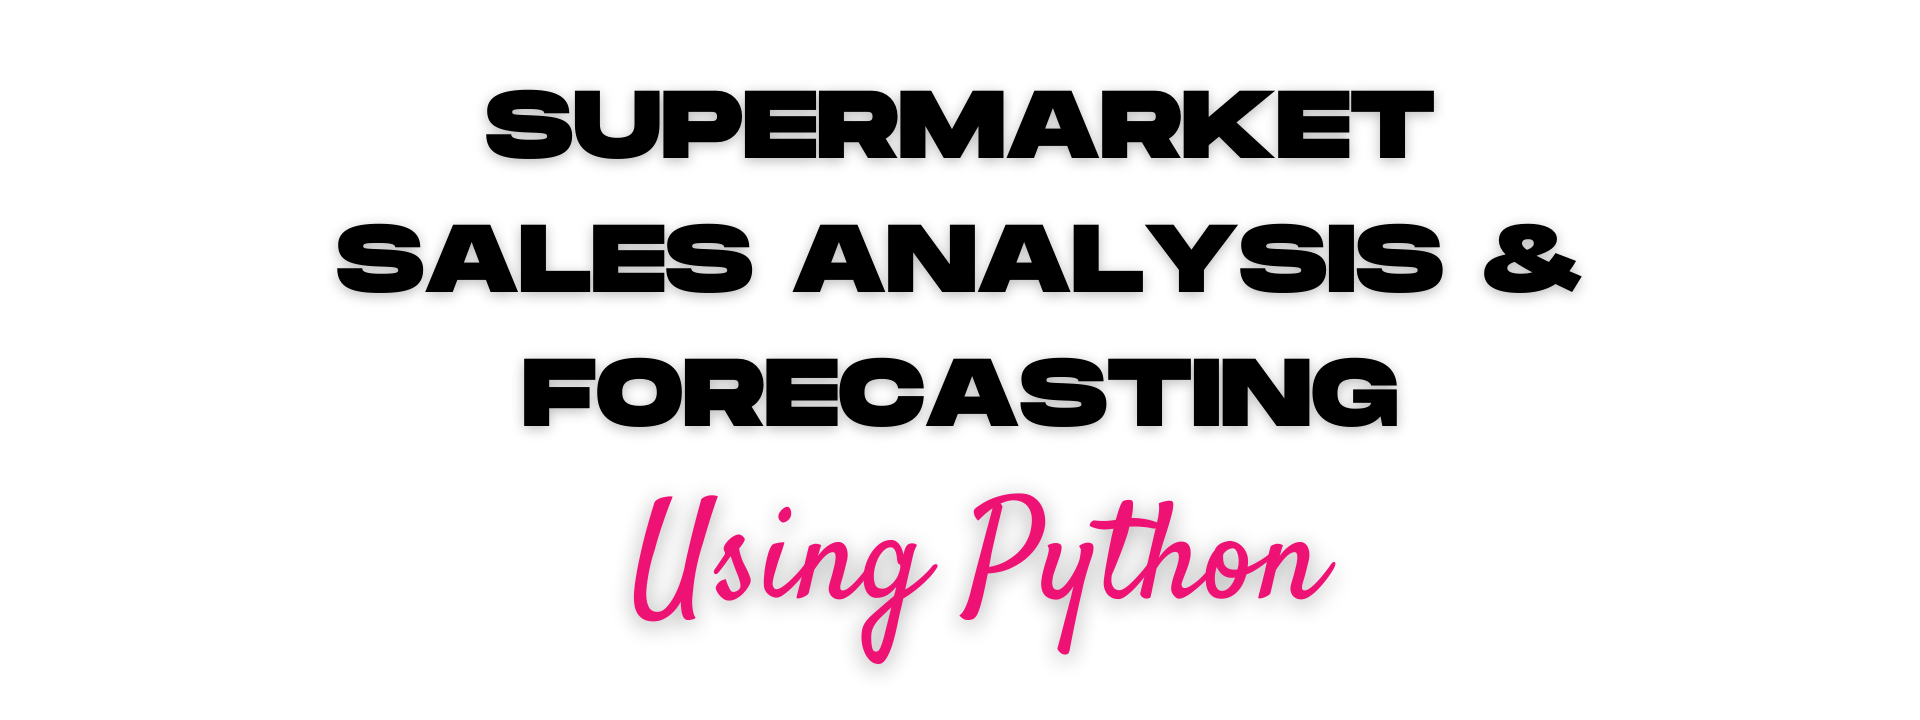

In this project we have used a Supermarket data and got insights by asking the right questions, and visualized them for better understanding.
This helps to get insights from data, which will help to take further decisions.
This predictive model helps customer's next shopping list.
The data-set used in this project is available on kaggle.com under opensource licence.

.

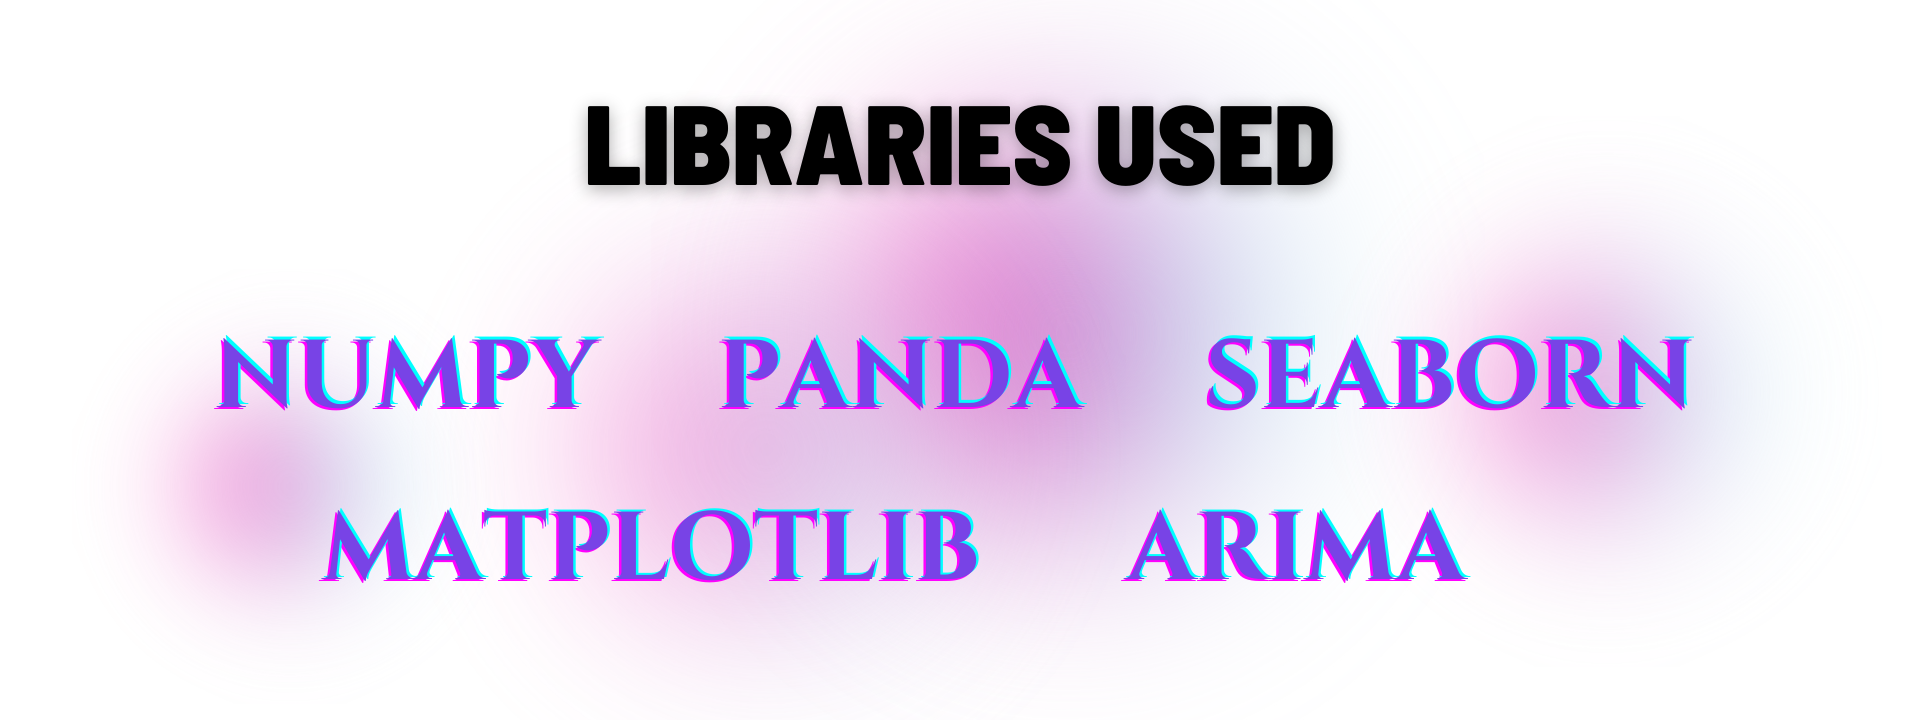

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Overview
overwiewing the data

In [2]:
df=pd.read_csv('supermarketsales1.csv')

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Dimensions
Determining the various dimensions

In [3]:
df.shape

(1000, 17)

In [4]:
df.describe()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


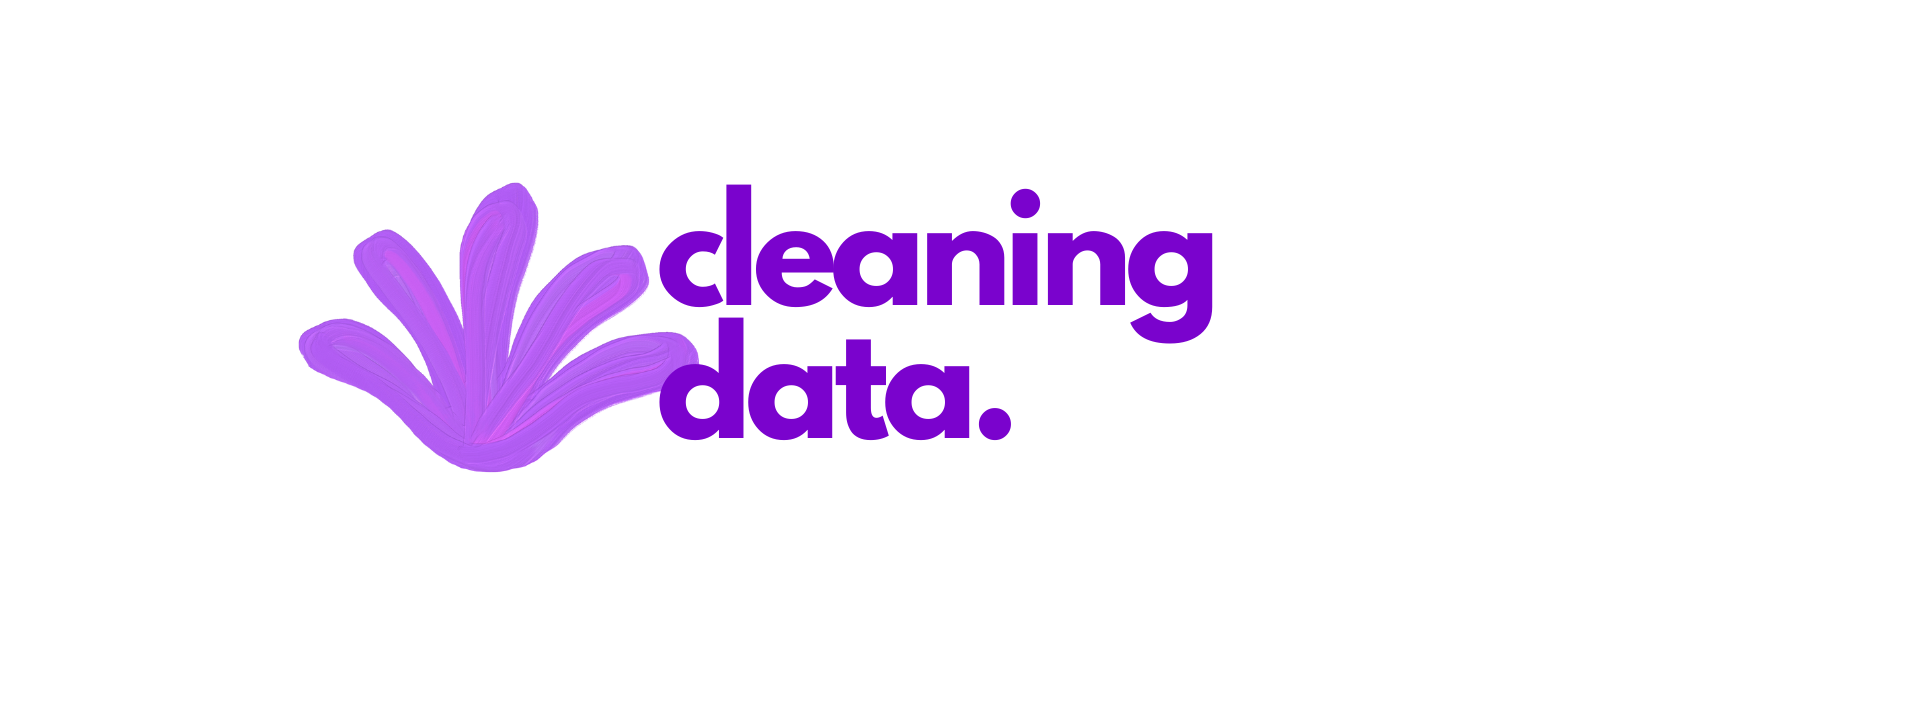


Applying cleaning of data 
eleminating duplicate values, changing of data types and more.


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
#no null values are present in the dataset
#Date,Time ARE string so these need to be changed 

In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df=df.drop(['Invoice ID'],axis=1)
#dropping Invoice ID column as it is not useful in our analysis

In [9]:
df['gross margin percentage'].unique()

array([4.76190476])

In [10]:
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

Since we do not have anu null values or duplicates we can go ahead and convert the column values into thier corresponding datatypes.

In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df['Time']=pd.to_datetime(df['Time'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   City                     1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

# Now our Data is Cleaned and ready to be used in Analysis.

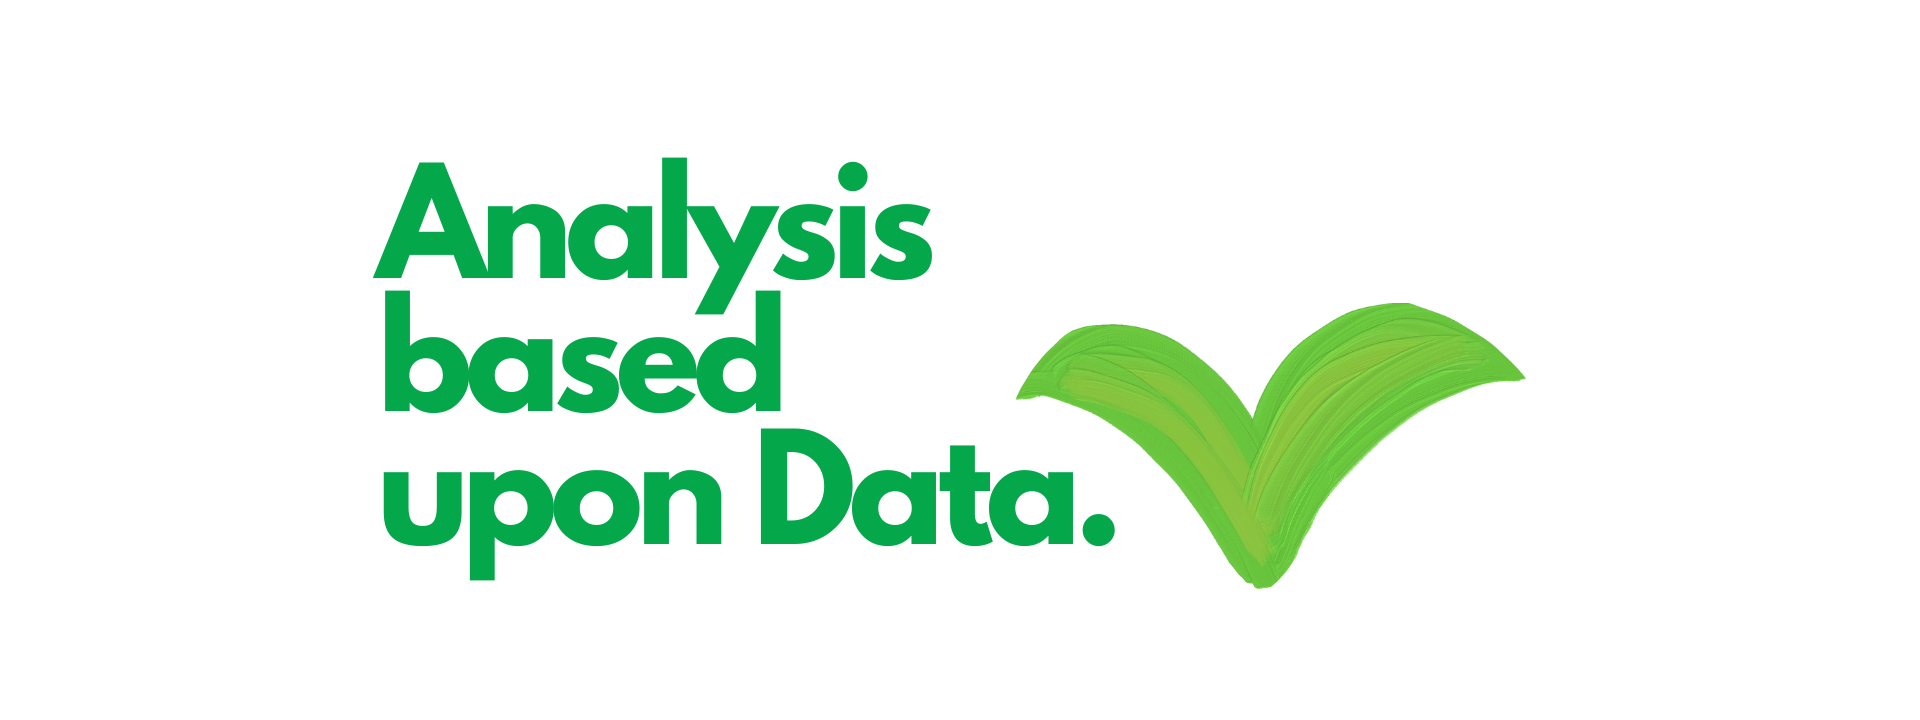

It evaluates exploratory data analysis based upon data and provides us powerfull insights.

..

In [14]:
df['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

### Checking if the store is more popular to a particular gender or not

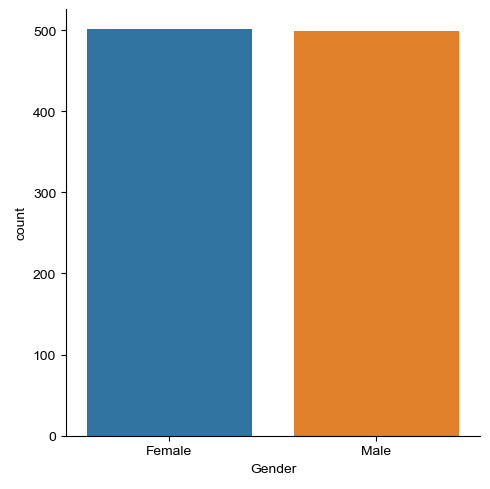

In [15]:
sns.catplot(x='Gender',kind='count',data= df)
sns.set(rc={'figure.figsize':(5,7)},palette='Paired')

There is no difference in the amount of female and male customers visiting the store.

### Analyzing the customer rating column

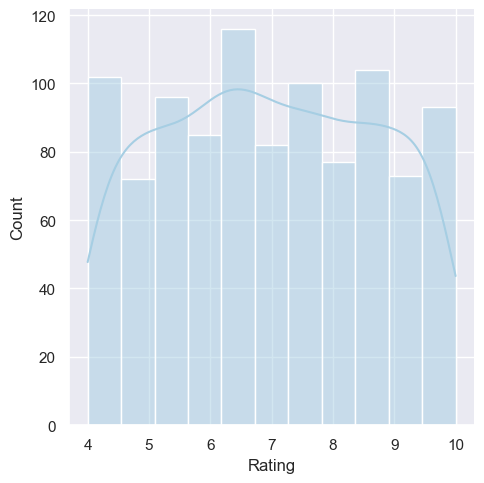

In [16]:
sns.displot(x='Rating',data=df,kde=True)
plt.show()

The distribution seems to be almost uniform with a slight deviation from the normal.Lets check the skewness of the distribution using skew function of pandas library

In [17]:
df['Rating'].skew()

0.00900964876573073

A skewnwss of 0.009 is very low and so the distribution can be said to be unskewed.

### Now i want to check the aggregate sales across the branches

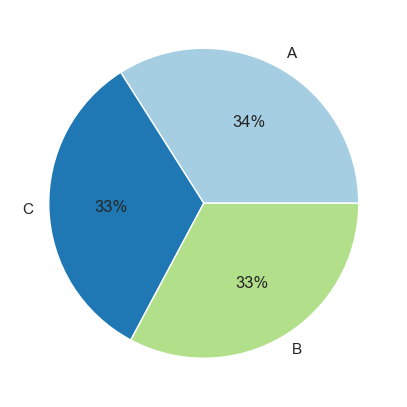

In [18]:
plt.pie(df['Branch'].value_counts(),labels=df['Branch'].unique(),autopct='%0.0f%%')
plt.show()

The pie chart represents the relative amount of total sales happening across branches A,B AND C.All three of these branches seem to be fairing well in thier respective locations.

### Lets see what is the most popular payment method used by customers

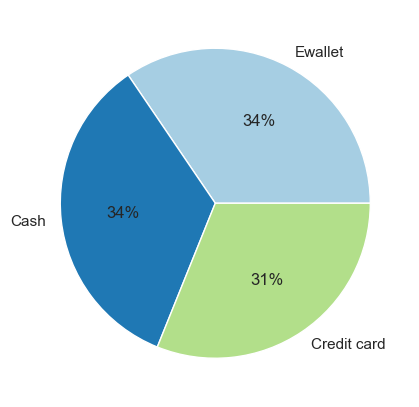

In [19]:
plt.pie(df['Payment'].value_counts(),labels=df['Payment'].unique(),autopct='%0.0f%%')
plt.show()

E-wallet and Cash are the most used methods.

### Does gross income affect customer rating?

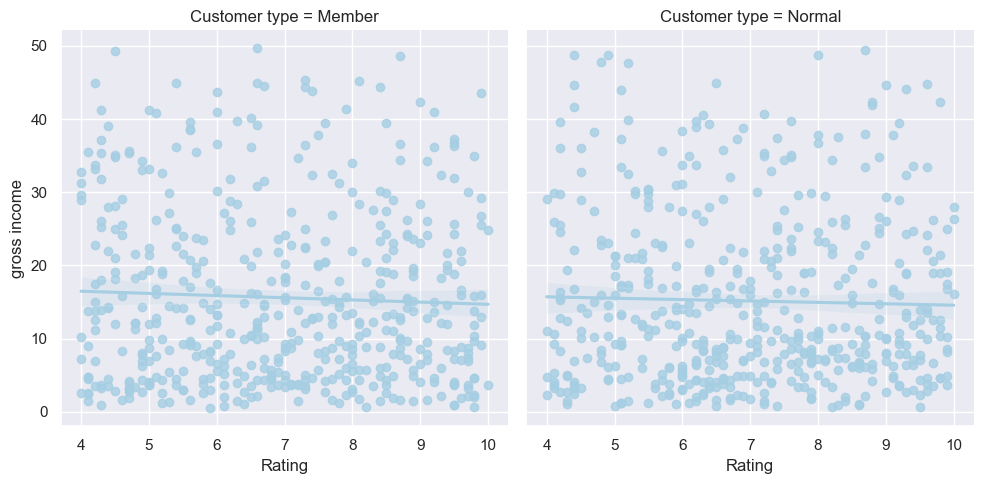

In [20]:
sns.lmplot(x='Rating',y='gross income',data=df,col='Customer type')

The linier model plot gives a scatter plot along with a linier model approximation of the data points .From the plot it seems like there is no relation between customers rating and the income the store generates on the order.

..

## Untill Now there are no interrelated insights, from which we can conclude or manupulate things upon.
..
## So, Analysing Data in more ways.

..

### Lets Check ,which is the most profitable branch?

<Axes: xlabel='Branch', ylabel='gross income'>

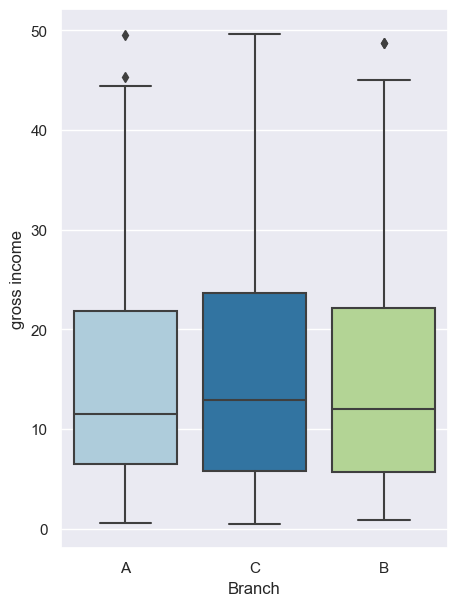

In [21]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

Evidently the branch C is doing the better than the other branches by a small margin.

### Relationship between Gender and Gross Income

<Axes: xlabel='Gender', ylabel='gross income'>

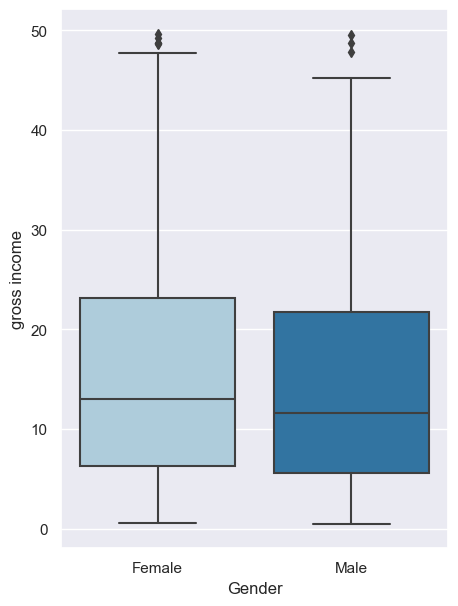

In [22]:
sns.boxplot(x='Gender',y='gross income',data=df)

Gross income is similar for both male and female customers but there is a slightly higher mean of income generated from female. 

###  Trend in gross income

(array([17897., 17911., 17928., 17942., 17956., 17970., 17987.]),
 [Text(17897.0, 0, '2019-01-01'),
  Text(17911.0, 0, '2019-01-15'),
  Text(17928.0, 0, '2019-02-01'),
  Text(17942.0, 0, '2019-02-15'),
  Text(17956.0, 0, '2019-03-01'),
  Text(17970.0, 0, '2019-03-15'),
  Text(17987.0, 0, '2019-04-01')])

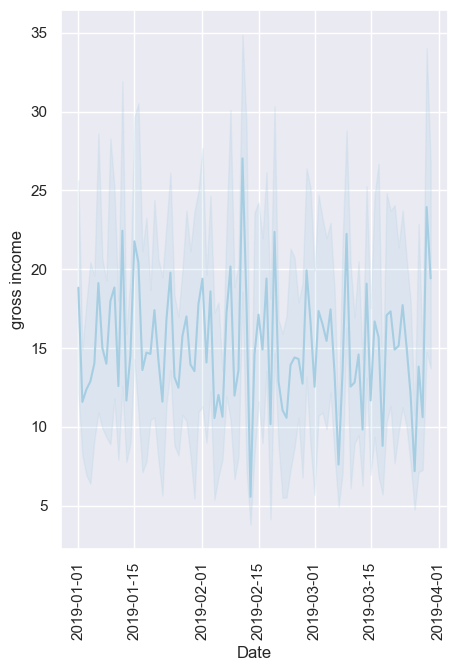

In [23]:
sns.lineplot(x=df.Date,y=df['gross income'])
plt.xticks(rotation=90)


As we can see in the plot above,there is no certain trend which the income generated follows depending on the time series of dates provided in the data set. 

### Which product line generates the most income?

In [24]:
df.head()


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-11-30 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-11-30 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-11-30 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-11-30 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-11-30 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


### Which product line helps generate the most income?

In [25]:
totalsales=df[["Product line","gross income"]].groupby(['Product line'],as_index= False).sum().sort_values(by= 'gross income',ascending= False)
totalsales

,Product line,gross income
2,Food and beverages,2673.5640
5,Sports and travel,2624.8965
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
3,Health and beauty,2342.5590


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Food and beverages'),
  Text(1, 0, 'Sports and travel'),
  Text(2, 0, 'Electronic accessories'),
  Text(3, 0, 'Fashion accessories'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Health and beauty')])

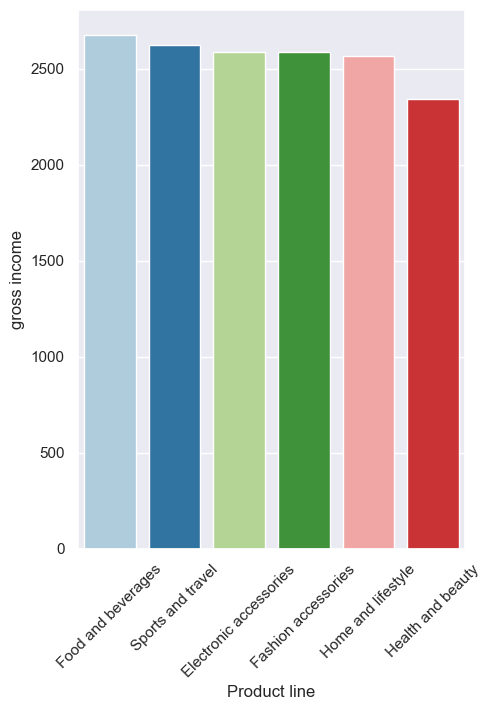

In [26]:
sns.barplot(x='Product line',y='gross income',data=totalsales)
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=45)


When we calculate the total sum of income generated from each product line ,we see that Food and Beverages AND Sports and Travel has the highest values.

### Spending pattern of both males and females(which category do they spend more)

In [28]:
sns.countplot(df['Product line'],hue = df.Gender,palette='Set2')
plt.xticks(rotation=45)



ValueError: Cannot use `hue` without `x` and `y`

Males spend more on Health and Beauty than females .

Females purchase more Fashion accessories and Sports and Travel than males.

### Which day of the week has maximum sales?

In [29]:
df['day'] = df['Date'].dt.day_name()   #to get the day of the date column
df.head()


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-11-30 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-11-30 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-11-30 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-11-30 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-11-30 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday


<Axes: xlabel='day', ylabel='gross income'>

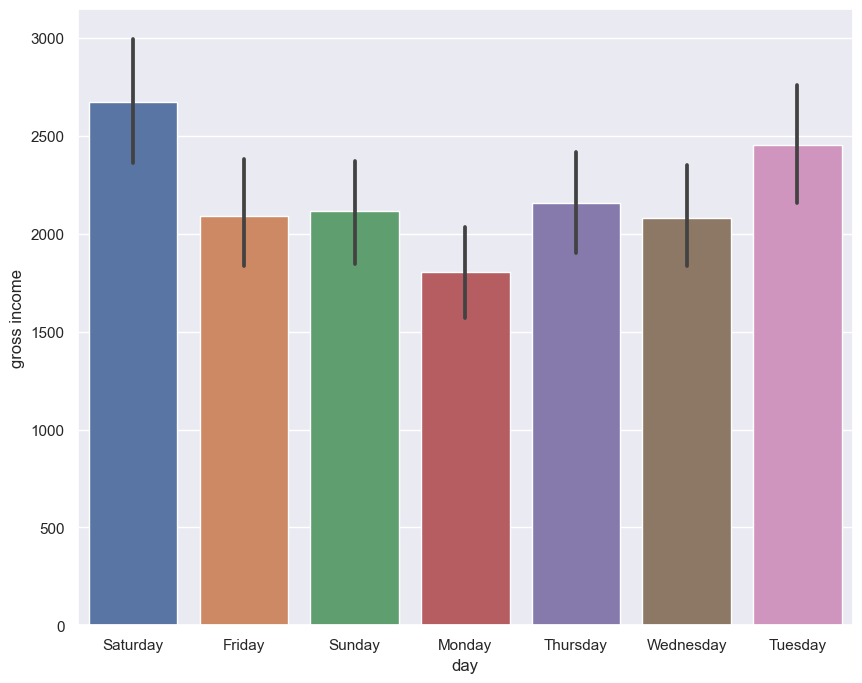

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(x='day',y='gross income',data=df,estimator=sum)
#using estimator=sum parameter to get the total gross income for each day in our plot rather than the mean of gross income .

Sales is highest on Saturday followed by Sunday and it was lowest on monday.Hence we can say that sales are higher on weekends and lower on weekdays.

### Now lets check which hour of the day is the busiest

In [31]:
df['Hour']=df['Time'].dt.hour
df.head()


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,Hour
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-11-30 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-11-30 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,10
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-11-30 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,13
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-11-30 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,20
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-11-30 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,10


In [32]:
hourly_customer=df['Hour'].value_counts().reset_index()
hourly_customer

,Hour,count
0,19,113
1,13,103
2,15,102
3,10,101
4,18,93
5,11,90
6,12,89
7,14,83
8,16,77
9,20,75


In [33]:
sns.lineplot(x='index',y='Hour',data=hourly_customer)
sns.set(rc={'figure.figsize':(14,7)})

ValueError: Could not interpret value `index` for parameter `x`

Looks like the 19th hour,that is 7PM IN THE EVENING IS THE BUSIEST HOUR OF THE DAY WITH THE MOST AMOUNT OF CUSTOMERS PURCHASING ITEMS.

### What product line should the supermarket focus on?

HERE WE CAN HAVE TWO APPROCHES by which we can ANSWER THIS QUESTION.
1)By looking for the highest rated product line
2)By looking for the most sold products

<Figure size 1200x1000 with 0 Axes>

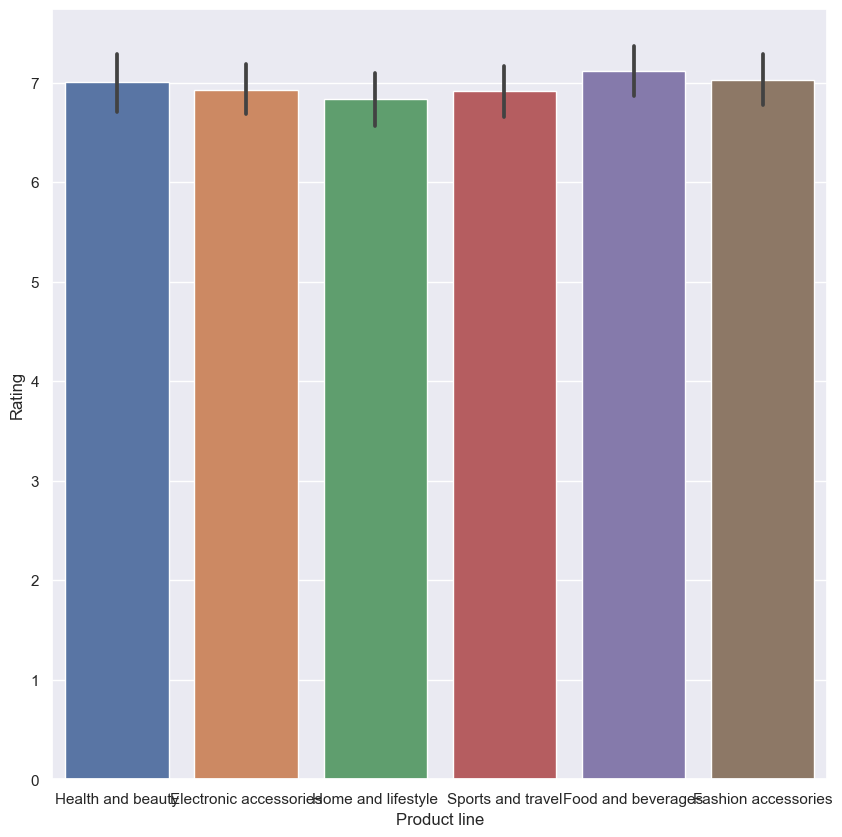

<Figure size 1200x1000 with 0 Axes>

In [34]:
sns.barplot(x='Product line',y='Rating',data=df)
plt.figure(figsize=(12,10))

<Axes: xlabel='Product line', ylabel='Quantity'>

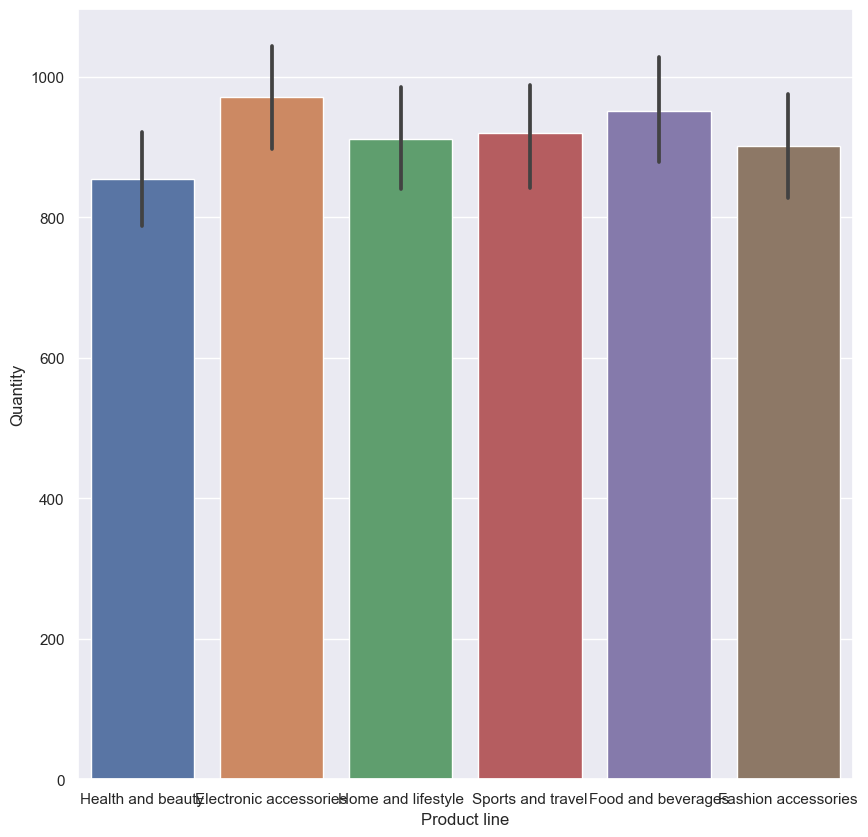

In [35]:
sns.barplot(x='Product line',y='Quantity',data=df,estimator=sum)

Rating for Fashion Accessories AND Food and Beverages is high but we can see that quantity purchased is high for Electronic accessories AND Food and Beverages.SO IN ORDER TO MEET THE DEMAND,Electronic accessories and Food and Beverages need to be on top priority.

### Now lets check where can we open a new store for expansion of the buisness

<Axes: xlabel='City', ylabel='gross income'>

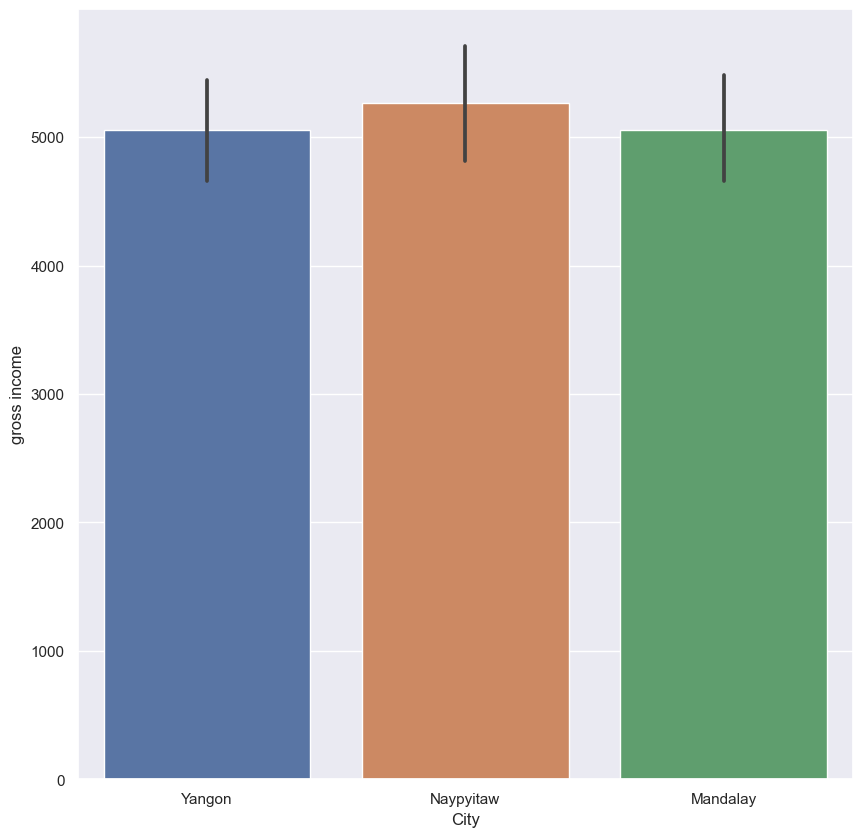

In [36]:
sns.barplot(x='City',y='gross income',data=df,estimator=sum)

Since the city NAYPYITAW has the highest mean gross income we should plan on expansion of branches in that city.

In [37]:
sns.countplot(df['Product line'],hue=df['City'])

ValueError: Cannot use `hue` without `x` and `y`

Since the product lines of Fashion accessories and Food and Beverages are the most popular it will be benificial if those two product lines are given higher priority over other product lines in terms of stocking,logistics,quality and other aspects. 

In [38]:
d=pd.read_csv('supermarketsales1.csv')
print("Dataset contains {} row and {} colums".format(d.shape[0],d.shape[1]))

Dataset contains 1000 row and 17 colums


In [39]:
pip install pandas

In [41]:
np.round(d.corr(),2)

ValueError: could not convert string to float: '750-67-8428'

In [42]:
plt.figure(dpi=125)
sns.heatmap(np.round(d.corr(),2),annot=True,cmap='RdYlBu_r')
plt.show()

ValueError: could not convert string to float: '750-67-8428'

<Figure size 1250x1250 with 0 Axes>

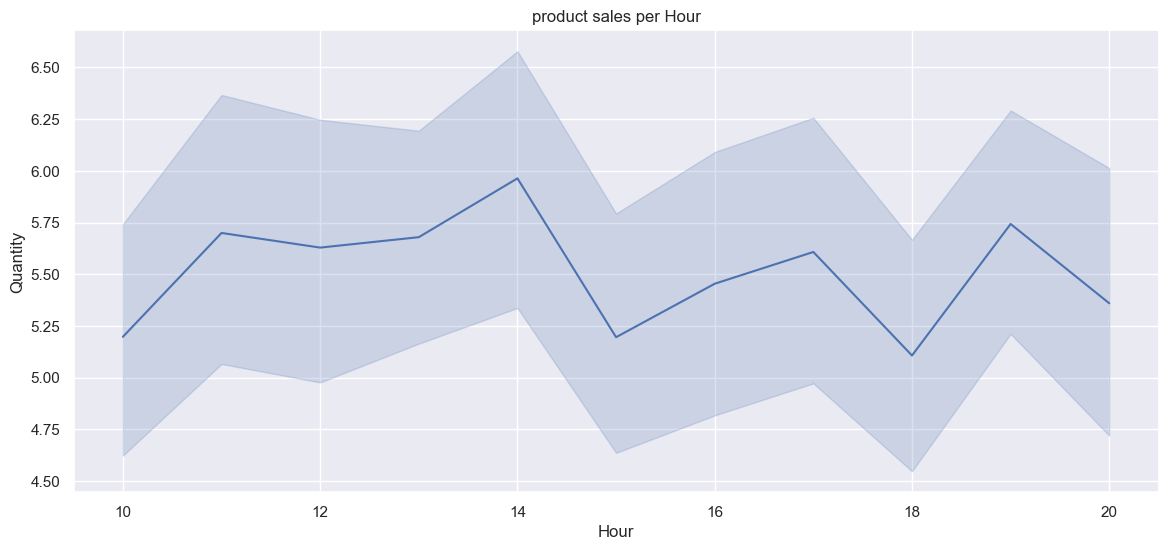

In [43]:
d["Time"]= pd.to_datetime(d["Time"])
d["Hour"]= (d["Time"]).dt.hour
plt.figure(figsize=(14,6)) 
SalesTime = sns.lineplot(x="Hour", y ="Quantity", data = d).set_title("product sales per Hour")

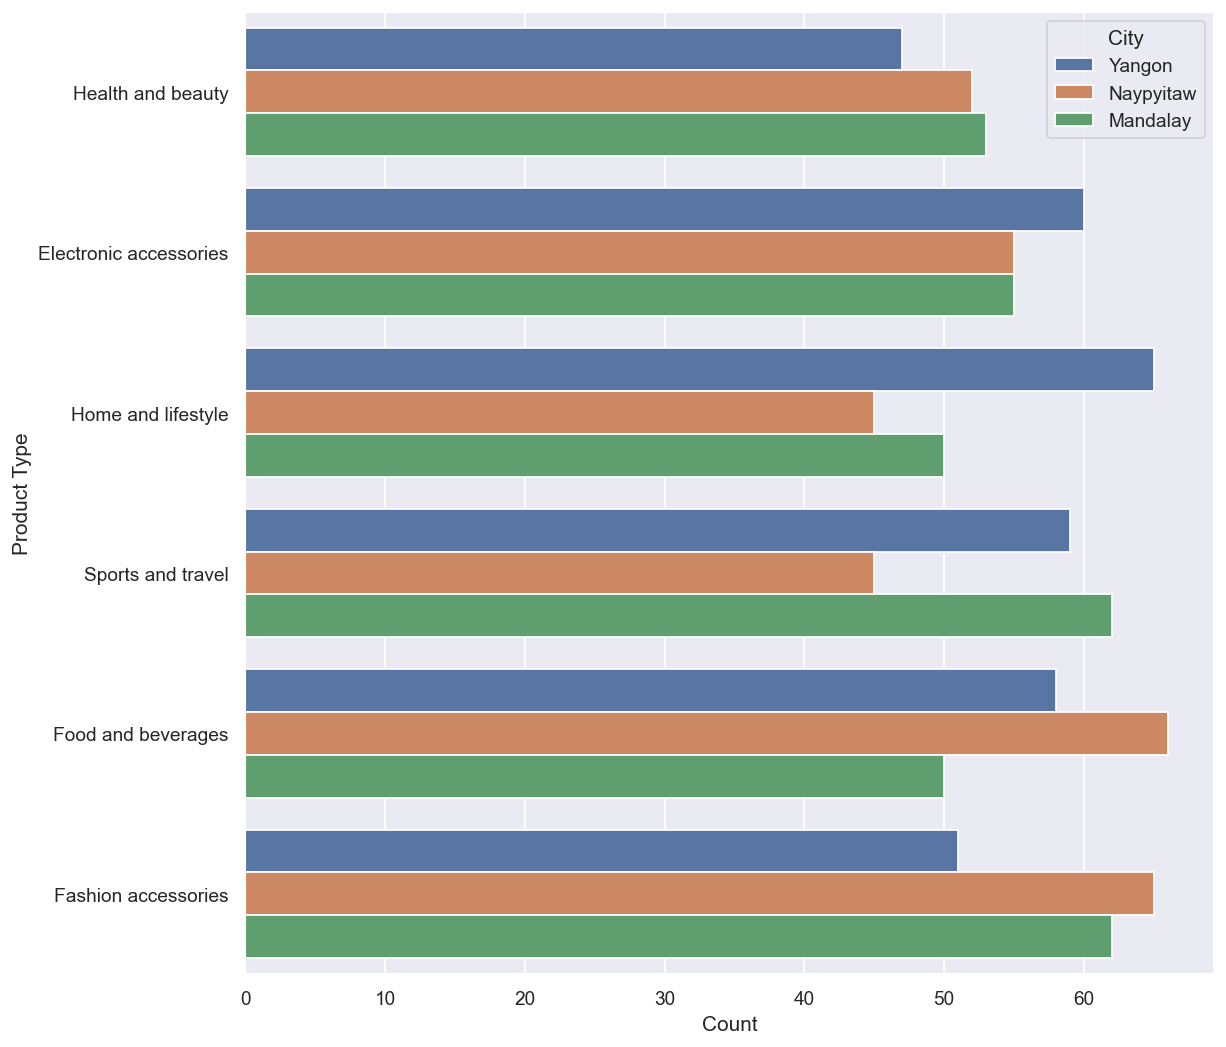

In [44]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = d) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

# analysis based upon gender

In [45]:
print(df.shape)
df['Gender'].value_counts()

(1000, 18)


Gender
Female    501
Male      499
Name: count, dtype: int64

In [46]:
sns.countplot('Gender',data=df)

TypeError: countplot() got multiple values for argument 'data'

In [47]:
gender_dummies=pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,True,False
1,True,False
2,False,True
3,False,True
4,False,True


In [48]:
df=pd.concat([df,gender_dummies],axis=1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,Hour,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-11-30 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,13,True,False
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-11-30 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,10,True,False
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-11-30 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,13,False,True
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-11-30 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,20,False,True
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-11-30 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,10,False,True


<Axes: xlabel='Product line', ylabel='Female'>

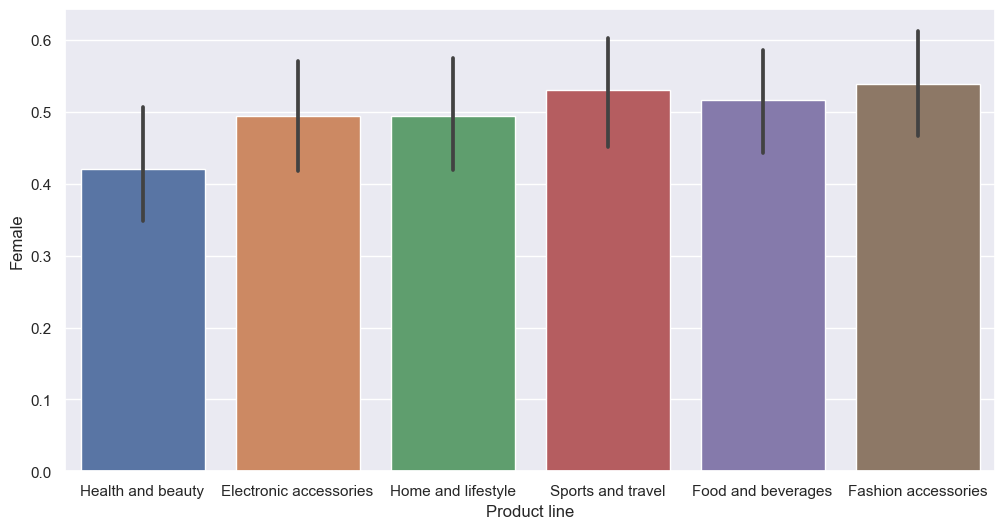

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(x="Product line",y="Female", data = df)

<Axes: xlabel='Product line', ylabel='Male'>

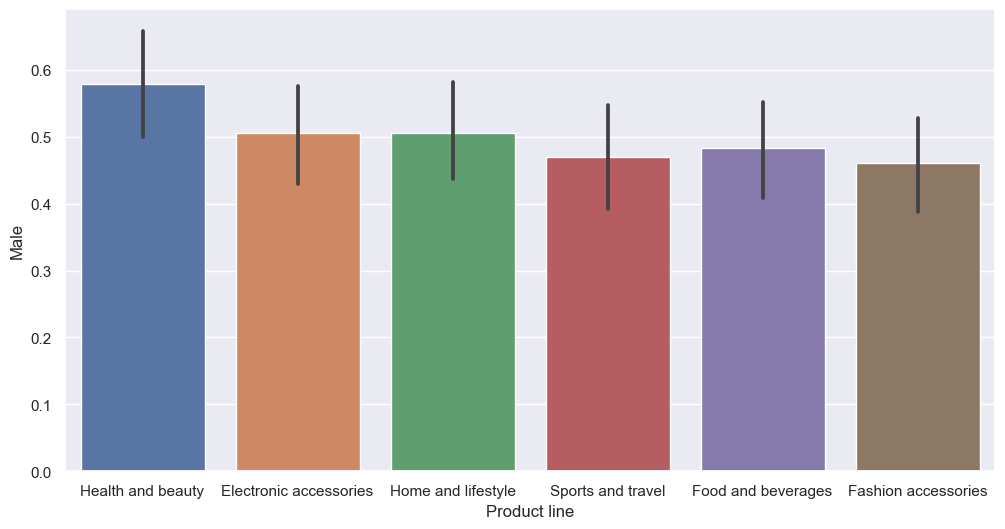

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(x="Product line",y="Male", data = df)

..


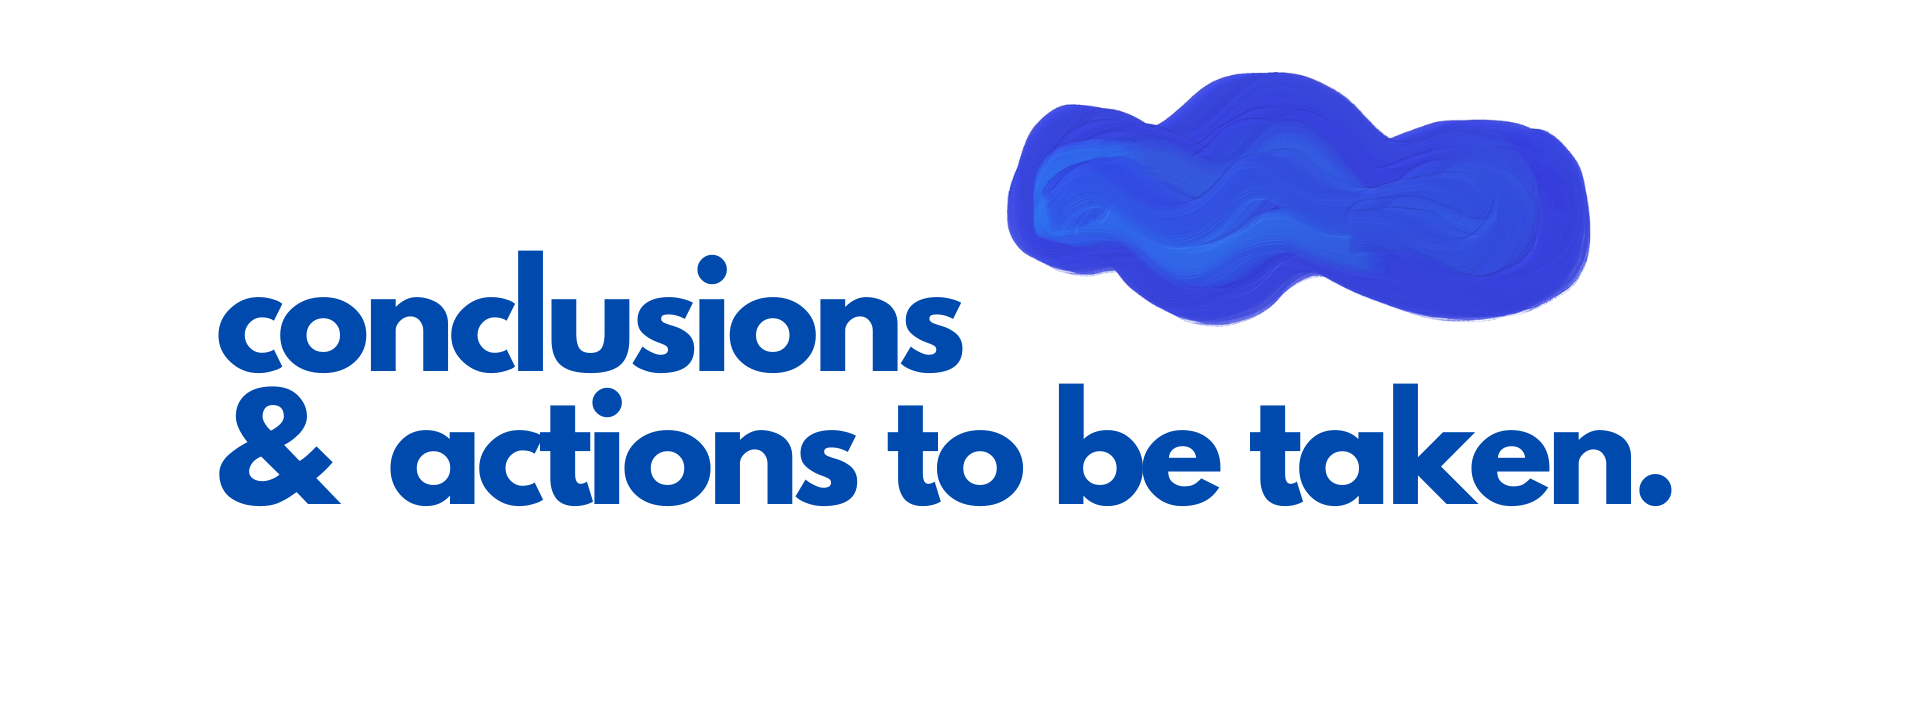

## conclusions, scope of improvement & actions to be taken

#### C brach has highest profit among all and females contribute to larger part of profit in all three branches. 
#### Food and Sports gives supermarket most sales whereas health gives less sales.
#### males are more interested in healthcare products and least interested in fashion products
#### females are spending more on fashion and least in sports.
*
### As, we concluded earlier supermarket sales are least in healthcare but males are most interested in healthcare products. so this means if volume of male customers increases, the healthcare section of supermarkets can see a rise.


#### On mondays, sales are least & highest on saturday followed by tuesday.
*
### So, by means like sale events or any other attracting strategy organized on low sale-scoring days like mondays can improve sales and profits.


#### 7 PM is the busiest hour of the day
*
### Arranging more staff around 19th hour colud help in fluency and hassle free shopping experience.


#### Health section have highest ratings yet lowest sales.
*
### To improve this we have to attract more male customers.

#### Yangon branch have highest sales in electronics and home supplies
#### Mandalay branch have highest sales in sports and fashion
#### Napatlay branch have highest sales in food and fashion
*
### Supermarket needs to focus on other categories that are not popular in any of three branches like healthcare and lifestyle section

### We can conclude that healthcare and lifestyle sector are'nt doing well.

..

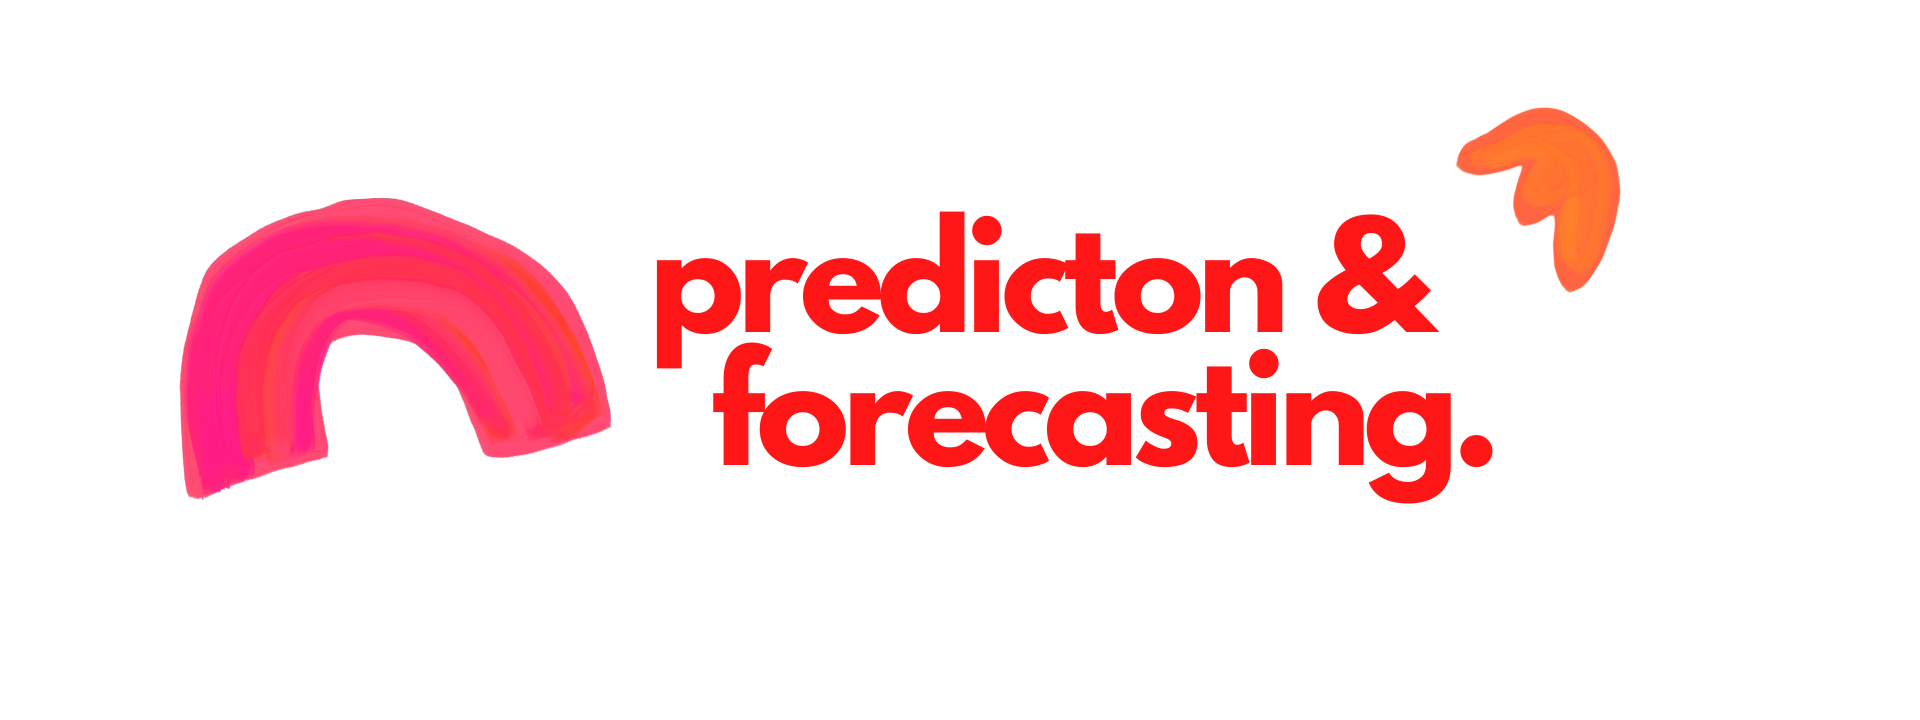

we make test cases using arima library and sarimax library and furthermore predicting the sales for upcoming one month.

In [51]:
#   (ii)if p value<0.05 then we will reject null hypothesis and accept the alternate hypothesis which say data is stationary
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(df['cogs'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                 -30.603524
p-value                          0.000000
Lags Used                        0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
Critical Value (10%)            -2.568313
dtype: float64


In [55]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/61/d3/68990f655b015afa9c10e8e0b88e6efc900d8f6f852322d33d20601e22d2/Cython-3.0.6-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 435.7 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/614.7 kB 880.9 kB/s eta 0:00:01
   ----------------- ---------------------- 276.5/614.7 kB 1.9 MB/s eta 0:00:01
   ---------------------------- ----------- 440.3/614.7 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 2.8 MB/s eta 0:00:00
   -------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [56]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(df["cogs"], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=14953.532, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=14374.028, Time=0.72 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.70 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=14647.800, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=14232.963, Time=2.11 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.82 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.09 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=14518.302, Time=0.47 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=14125.114, Time=2.42 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=14267.955, Time=1.22 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=7.50 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.12 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=14072.650, Time=3.21 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AI

In [57]:
#importing Sarimax and passing the parameters
from statsmodels.tsa.statespace.sarimax import SARIMAX
m=SARIMAX(df['cogs'], order=(3,1,0),seasonal_order=(2,1,0,12))
res=m.fit()

In [58]:
df['arima_predict']=res.fittedvalues

In [59]:
forecast=res.predict(start=len(df),end=len(df)+35)

In [60]:
forecast

1000     545.795263
1001     358.519118
1002     353.130317
1003     529.710286
1004     275.063526
1005     333.480107
1006     761.341885
1007     483.866081
1008     893.202382
1009     348.586396
1010     244.032465
1011     539.594298
1012     693.200427
1013     513.367148
1014     360.717997
1015     585.574657
1016     360.912859
1017     395.999716
1018     730.854893
1019     571.780440
1020     988.699720
1021     386.711233
1022     258.624513
1023     698.700797
1024     844.007463
1025     646.914869
1026     479.733735
1027     783.951655
1028     393.789946
1029     445.016782
1030     644.911293
1031     498.910622
1032    1102.829221
1033     394.442189
1034     333.280132
1035     768.583496
Name: predicted_mean, dtype: float64

In [63]:
df['cogs'] .append(forecast)

AttributeError: 'Series' object has no attribute 'append'

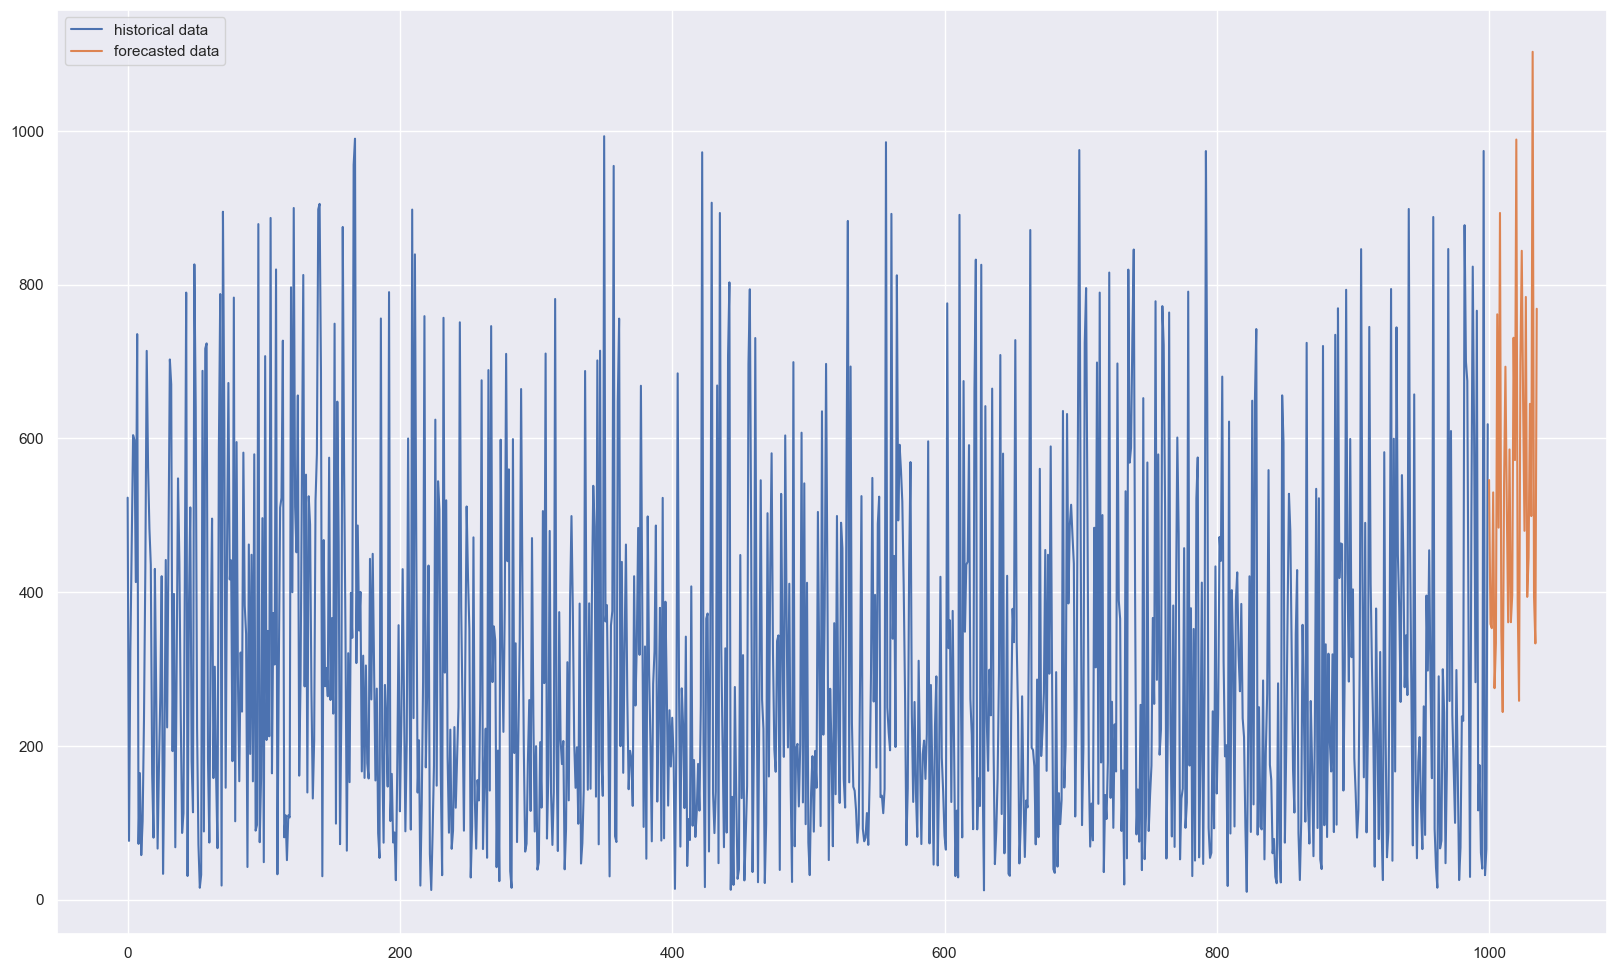

In [62]:
#plot between historical data and forecasted data
plt.figure(figsize=(20, 12))
plt.plot(df['cogs'],label="historical data")
plt.plot(forecast,label="forecasted data")
plt.legend()

*

# From this we can clearly see Supermarket's sales are going in uptrend according to prediction for upcoming next 30 days.

# This model will help Supermarket to improve thier profits, eliminate thier mistakes.

## with help of EDA and Predicting libraries we have analysed data in such a way that it asks important questions and helps us in making necessary decesions based upon the fact of analysed data.

.

#                                                       Thank you.

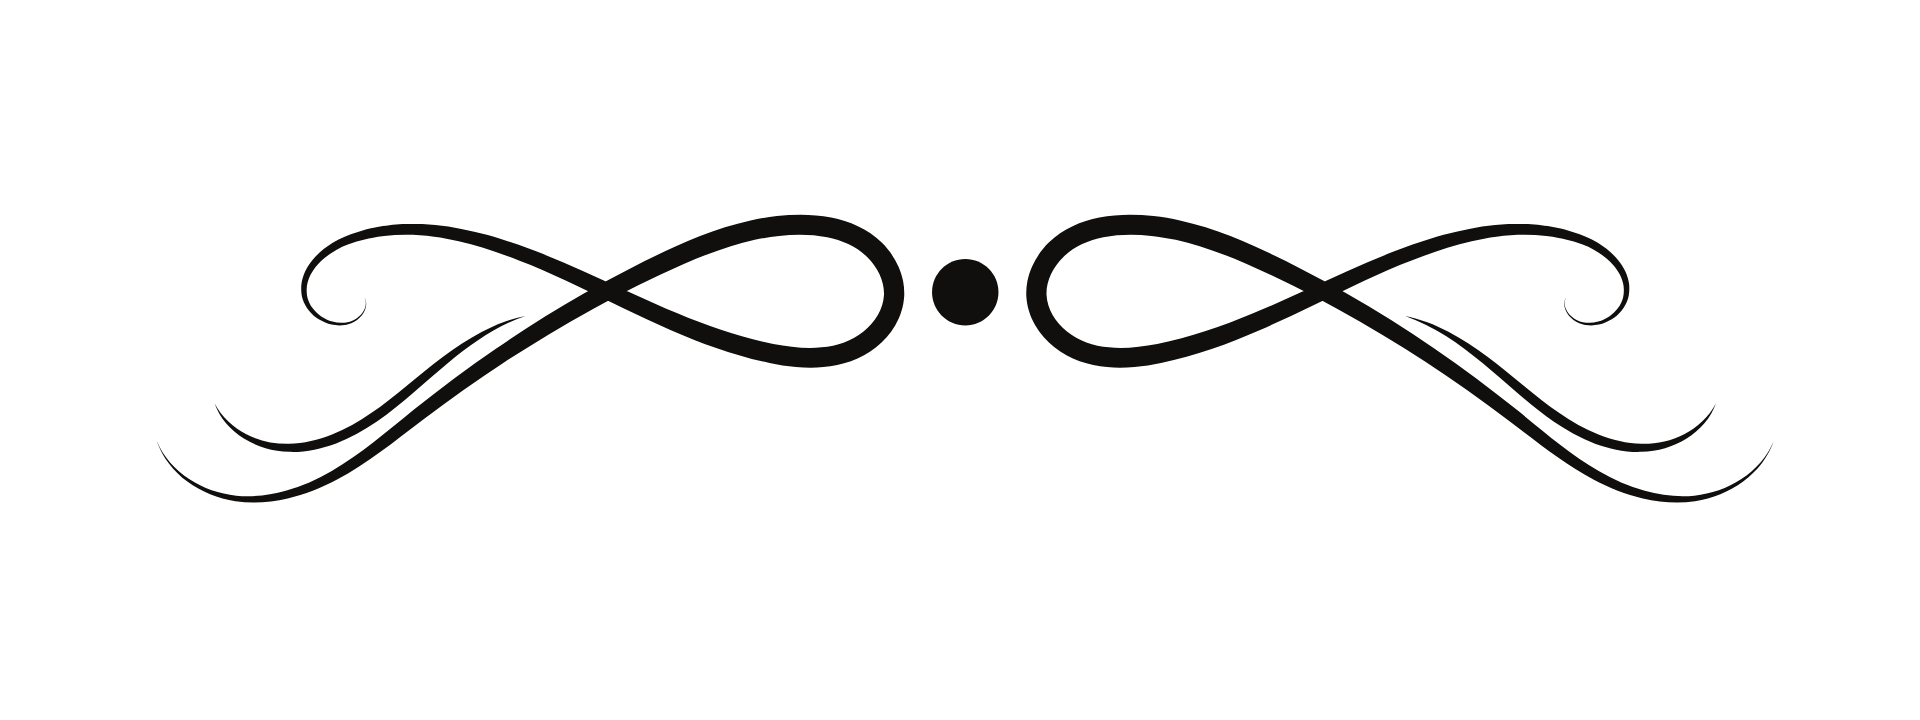